# E. Coli
Infection Rates Over Time Compared In A Variety of Ways

In [26]:
# importing dependencies
# do we need additional dependencies? guessing no?
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from pandas import Series, DataFrame


# E. Coli data files
# should we call in the meningitis and/or covid data files also?  guessing no to keep things simple and organized?  
ecoli_data_df = "Escherichia_Coli_NationalOutbreakPublicDataTool.csv"

In [27]:
# Read the E. Coli data 
ecoli_df = pd.read_csv(ecoli_data_df)

# Display the data table for preview
ecoli_df.head()


,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,...,Deaths,Info on Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type,Animal Type Specify,Water Status
0,2015,1,Ohio,Food,Norovirus Genogroup II,GII.6,Confirmed,Restaurant - Sit-down dining,4,0.0,...,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,Virginia,Food,NaN,NaN,NaN,Restaurant - Sit-down dining; Private home/res...,20,0.0,...,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,Ohio,Food,Norovirus Genogroup II,GII.6,Confirmed,Restaurant - Sit-down dining,15,1.0,...,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,Ohio,Food,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,3,0.0,...,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,Minnesota,Food,Norovirus Genogroup II,NaN,Confirmed,Restaurant - Sit-down dining,7,0.0,...,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#check data types of columns using in analysis
ecoli_df.dtypes

Year                              int64
Month                             int64
State                            object
Primary Mode                     object
Etiology                         object
Serotype or Genotype             object
Etiology Status                  object
Setting                          object
Illnesses                         int64
Hospitalizations                float64
Info on Hospitalizations        float64
Deaths                          float64
Info on Deaths                  float64
Food Vehicle                     object
Food Contaminated Ingredient     object
IFSAC Category                   object
Water Exposure                  float64
Water Type                      float64
Animal Type                     float64
Animal Type Specify             float64
Water Status                    float64
dtype: object

In [28]:
#print data to check for information needed for analysis
for x in ecoli_df.columns:
    print ("----------------------")
    print (x)
    print (ecoli_df[x].value_counts())

----------------------
Year
2018    1054
2015     924
2019     873
2017     861
2016     854
2020     299
Name: Year, dtype: int64
----------------------
Month
5     474
12    460
3     459
6     459
4     435
7     419
8     404
2     391
1     378
9     337
11    336
10    313
Name: Month, dtype: int64
----------------------
State
California        547
Florida           350
Ohio              343
Multistate        271
Illinois          250
Washington        232
Minnesota         223
Texas             217
New York          214
Michigan          187
Colorado          165
Wisconsin         148
Kansas            137
Maryland          104
Tennessee         101
Virginia           98
Utah               98
Georgia            97
Oregon             90
Connecticut        86
Massachusetts      80
South Carolina     76
Pennsylvania       64
Hawaii             63
Puerto Rico        58
Arizona            56
Iowa               55
North Carolina     47
Rhode Island       30
Kentucky           29
New J

In [29]:
#checking for n/as
ecoli_df.isnull().sum()

Year                               0
Month                              0
State                              0
Primary Mode                       0
Etiology                        1040
Serotype or Genotype            3266
Etiology Status                 1040
Setting                           77
Illnesses                          0
Hospitalizations                  80
Info on Hospitalizations          80
Deaths                            62
Info on Deaths                    73
Food Vehicle                    2855
Food Contaminated Ingredient    4054
IFSAC Category                  2855
Water Exposure                  4865
Water Type                      4865
Animal Type                     4865
Animal Type Specify             4865
Water Status                    4865
dtype: int64

In [30]:
#check for duplicates
#look into this more, where are the duplicates?
duplicates_df=ecoli_df[ecoli_df.duplicated()]
duplicates_df

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,...,Deaths,Info on Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type,Animal Type Specify,Water Status
54,2015,2,Ohio,Food,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,3,0.0,...,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
624,2015,12,Florida,Food,NaN,NaN,NaN,Restaurant - Sit-down dining,2,0.0,...,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,2016,1,Ohio,Food,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,3,0.0,...,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
852,2015,8,California,Food,Norovirus unknown,NaN,Suspected,Restaurant - Sit-down dining,4,0.0,...,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,2016,2,Michigan,Food,NaN,NaN,NaN,Restaurant - Sit-down dining,3,0.0,...,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009,2016,2,Michigan,Food,NaN,NaN,NaN,Restaurant - Sit-down dining,3,0.0,...,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1029,2016,4,Texas,Food,NaN,NaN,NaN,Restaurant - Sit-down dining,7,0.0,...,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1050,2015,12,California,Food,Norovirus unknown,NaN,Suspected,Restaurant - Sit-down dining,2,0.0,...,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1168,2016,4,North Carolina,Food,NaN,NaN,NaN,Long-term care/nursing home/assisted living fa...,16,0.0,...,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1488,2016,12,Ohio,Food,Norovirus,NaN,Suspected,"Restaurant - ""Fast-food""(drive up service or p...",2,0.0,...,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#print dataframe grouped by year

ecoli_2018=ecoli_df[ecoli_df["Year"]==2018]
ecoli_2019=ecoli_df[ecoli_df["Year"]==2019]
ecoli_2020=ecoli_df[ecoli_df["Year"]==2020]

ecoli_year=ecoli_df.groupby(["Year"]).agg({"Illnesses":["sum"]})

# Filter the DataFrame down only to those columns to chart
ecoli_df = ecoli_df[["Year","Month", "State", "Illnesses"]]

# Set the index to be "Year" so they will be used as labels
#ecoli_df = ecoli_df.set_index("Year")

ecoli_2020.head()


,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,...,Deaths,Info on Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type,Animal Type Specify,Water Status
4271,2020,1,New York,Food,Clostridium perfringens,NaN,Suspected,Caterer (food prepared off-site from where ser...,7,0.0,...,0.0,7.0,curry chicken; pelau dish; curry chick peas w/...,chicken; peas; meat; chick peas; potatoes,Multiple,NaN,NaN,NaN,NaN,NaN
4273,2020,1,Massachusetts,Food,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,9,0.0,...,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4278,2020,1,Virginia,Food,Norovirus Genogroup II,GII.P16 -,Suspected,Restaurant - Sit-down dining,3,0.0,...,0.0,0.0,raw oysters,"oysters, raw",Mollusks,NaN,NaN,NaN,NaN,NaN
4281,2020,1,New York,Food,NaN,NaN,NaN,Grocery store,3,0.0,...,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4284,2020,1,Minnesota,Food,Norovirus Genogroup II,GII.P16 -,Confirmed,Restaurant - Sit-down dining,8,0.0,...,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#checking for number of months in 2020 data
ecoli_2020["Month"].value_counts()

2     49
1     44
7     36
8     30
6     24
5     20
9     20
10    19
12    16
11    15
3     14
4     12
Name: Month, dtype: int64

In [33]:
#aggregating by year AND month

ecoli_year_and_month=ecoli_df.groupby(["Year", "Month"]).agg({"Illnesses":["sum"]})
df=ecoli_year_and_month.reset_index()
df
#ecoli_year_and_month

,Year,Month,Illnesses
,,,sum
0,2015,1,858
1,2015,2,1008
2,2015,3,1429
3,2015,4,1342
4,2015,5,1490
...,...,...,...
67,2020,8,344
68,2020,9,205
69,2020,10,158


In [34]:
#grouping data by year, month and illness sum

ecoli_2018=df[df["Year"]==2018]
ecoli_2019=df[df["Year"]==2019]
ecoli_2020=df[df["Year"]==2020]

# ecoli_year=ecoli_df.groupby(["Year", "State"]).agg({"Illnesses":["sum"]})

ecoli_2018.columns=["Year", "Month", "Illnesses_Sum"]
ecoli_2019.columns=["Year", "Month", "Illnesses_Sum"]
ecoli_2020.columns=["Year", "Month", "Illnesses_Sum"]


ecoli_2018
#ecoli_year_and_month

,Year,Month,Illnesses_Sum
36,2018,1,1394
37,2018,2,722
38,2018,3,2034
39,2018,4,1949
40,2018,5,2665
41,2018,6,1575
42,2018,7,2064
43,2018,8,2074
44,2018,9,959
45,2018,10,1054


In [39]:
#reseting index so illnesses are summed by year

ecoli_year_df=ecoli_year.reset_index()

ecoli_year_df

,Year,Illnesses
,,sum
0,2015,15539
1,2016,14430
2,2017,15059
3,2018,19991
4,2019,11805
5,2020,5987


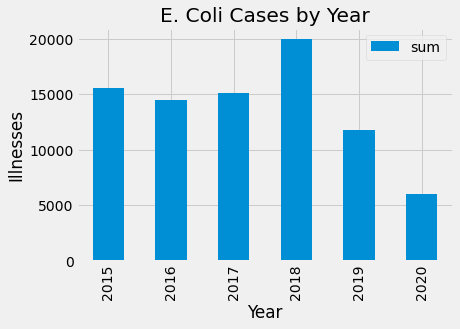

In [51]:
#bar graph for comparing e. coli cases by year

plt.xaxis = ['2018', '2019', '2020']

ecoli_year_df.plot.bar('Year', 'Illnesses')
plt.title('E. Coli Cases by Year')
plt.xlabel('Year')
plt.ylabel('Illnesses')
plt.show()

(0.0, 2800.0)

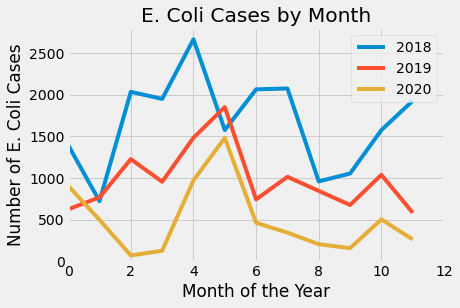

In [41]:
from matplotlib import style
style.use('fivethirtyeight')

plt.figure(2)
Month=ecoli_2018["Month"]
total_2018=ecoli_2018["Illnesses_Sum"].reset_index(drop=True)
total_2019=ecoli_2019["Illnesses_Sum"].reset_index(drop=True)
total_2020=ecoli_2020["Illnesses_Sum"].reset_index(drop=True)

total_2018.plot.line(x=Month, y=total_2018, label="2018")
total_2019.plot.line(x=Month, y=total_2019, label="2019")
total_2020.plot.line(x=Month, y=total_2020, label="2020")
plt.legend(loc="best")
plt.title('E. Coli Cases by Month')
plt.xlabel("Month of the Year")
plt.ylabel("Number of E. Coli Cases")
plt.xlim(0,12)
plt.ylim(0,2800)

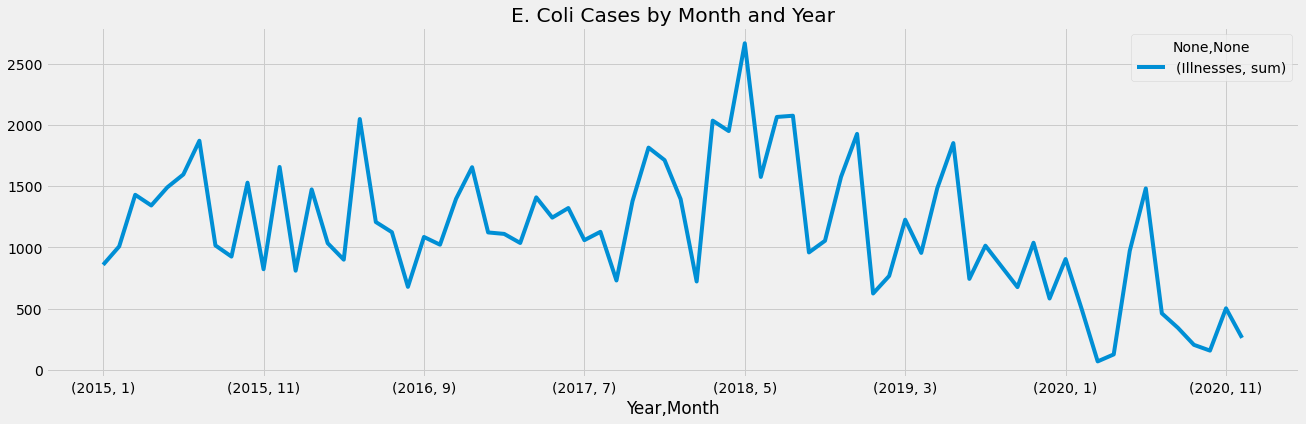

In [44]:
from matplotlib import style
style.use('fivethirtyeight')

ax=ecoli_year_and_month.plot(kind="line", figsize=(20,6))
    # ax.set_xticklabels(ecoli_year_and_month["Year", "Month"])
plt.title('E. Coli Cases by Month and Year')

plt.show()

Compare top 10 states (California, Texas, Florida, Illinois, Ohio, Georgia, Pennsylvania, Tennessee, North Carolina, New York) with the most covid cases


In [73]:
#create a dataframe for 2020 e. coli rates for the state that had the highest covid rates

ecoli_df
ecoli_top=ecoli_df[ecoli_df["Year"]==2020]
ecoli_high=ecoli_top[(ecoli_top["State"]=="California")|(ecoli_top ["State"]=="Texas")\
|(ecoli_top ["State"]=="Florida")|(ecoli_top ["State"]=="Illinois")|(ecoli_top ["State"]=="Ohio")|\
(ecoli_top ["State"]=="Georgia")|(ecoli_top ["State"]=="Pennsylvania")|(ecoli_top ["State"]=="Tennessee")|\
(ecoli_top ["State"]=="North Carolina")|(ecoli_top ["State"]=="New York")]
 
#ecoli_high["Illnesses"].sum()
ecoli_high2=ecoli_high.groupby(["State"]).agg({"Illnesses":["sum"]})
ecoli_high2


,Illnesses
,sum
State,
California,204
Florida,286
Georgia,33
Illinois,194
New York,22
North Carolina,236
Ohio,189
Pennsylvania,24


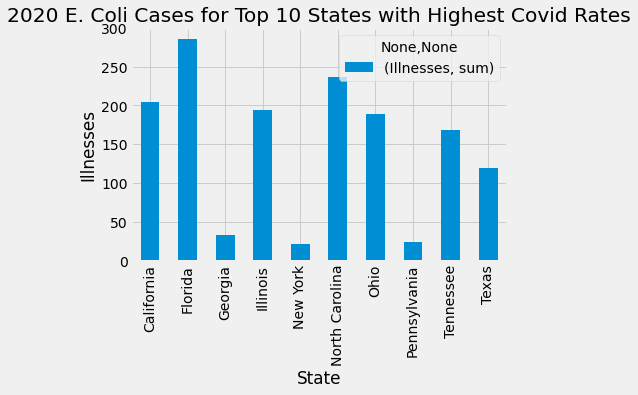

In [74]:
ecoli_high2.plot.bar()
plt.title('2020 E. Coli Cases for Top 10 States with Highest Covid Rates')
plt.xlabel('State')
plt.ylabel('Illnesses')
plt.show()

Compare bottom 10 states (Vermont, Hawaii, Maine, Wyoming, Arkansas, New Hampshire, Delaware, Montana, Rhode Island, North Dakota, West Virginia) with the least covid cases

In [77]:
#create a dataframe for 2020 e. coli rates for the state that had the lowest covid rates


ecoli_bottom=ecoli_df[ecoli_df["Year"]==2020]

ecoli_low=ecoli_bottom[(ecoli_bottom["State"]=="Vermont")|(ecoli_bottom ["State"]=="Hawaii")\
|(ecoli_bottom ["State"]=="Maine")|(ecoli_bottom ["State"]=="Wyoming")|(ecoli_bottom ["State"]=="Arkansas")|\
(ecoli_bottom ["State"]=="New Hampshire")|(ecoli_bottom ["State"]=="Delaware")|(ecoli_bottom ["State"]=="Montana")|\
(ecoli_bottom ["State"]=="Rhode Island")|(ecoli_bottom ["State"]=="North Dakota")|(ecoli_bottom ["State"]=="West Virginia")]
ecoli_low

,Year,Month,State,Illnesses
4347,2020,1,New Hampshire,19
4560,2020,7,Hawaii,11
4618,2020,8,Hawaii,2
4649,2020,10,Hawaii,2
4747,2020,1,North Dakota,8
4799,2020,5,Rhode Island,14
4817,2020,11,Maine,75
4825,2020,7,Hawaii,2
4826,2020,11,Hawaii,16
4837,2020,9,Maine,4


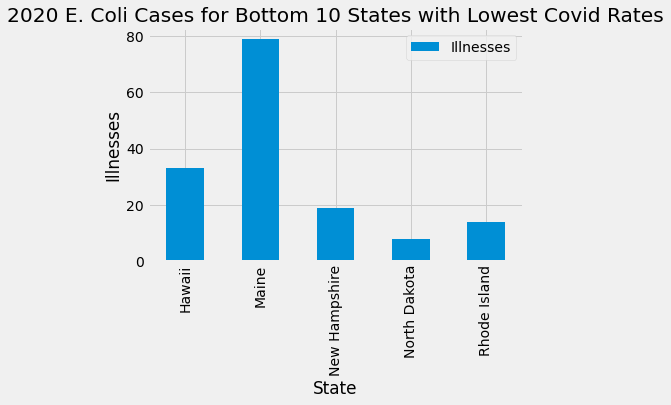

In [78]:
ecoli_low2.plot.bar()
plt.title('2020 E. Coli Cases for Bottom 10 States with Lowest Covid Rates')
plt.xlabel('State')
plt.ylabel('Illnesses')
plt.show()

In [81]:
#merge low & high dataframes
low_and_high=pd.merge(ecoli_low2, ecoli_high2, on =["Illnesses","State"], how="outer")
low_and_high.columns=["Illnesses"]

low_and_high

KeyError: 'Illnesses'